## **<center>Supervised Machine Learning</center>**
## <center>Decision Trees</center>

### **WORKING ENVIRONMENT SET UP**

In [45]:
#Data manipulation
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 
#import pydotplus


### LOAD DATA

### **Hitters: Baseball Data**

https://rdrr.io/cran/ISLR/man/Hitters.html

### **Description**

Major League Baseball Data from the 1986 and 1987 seasons. It contains statistics and salary information for profesional baseball players.


### **Model**

This database has many information related to the player. We want to build a **Regression Decision Tree** using only: *Hits*, *Years*, and *Salary*. The idea is to check if we are able to predict the *Salary* from their *Hits* and *Years*




In [2]:
df = pd.read_csv('data/Hitters.csv', index_col=0)
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Descriptive Analysis

In [47]:
df.count()

Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [3]:
df.isna().sum()

Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df.count()

Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [5]:
data = df.dropna()

In [6]:
data.isna().sum()

Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

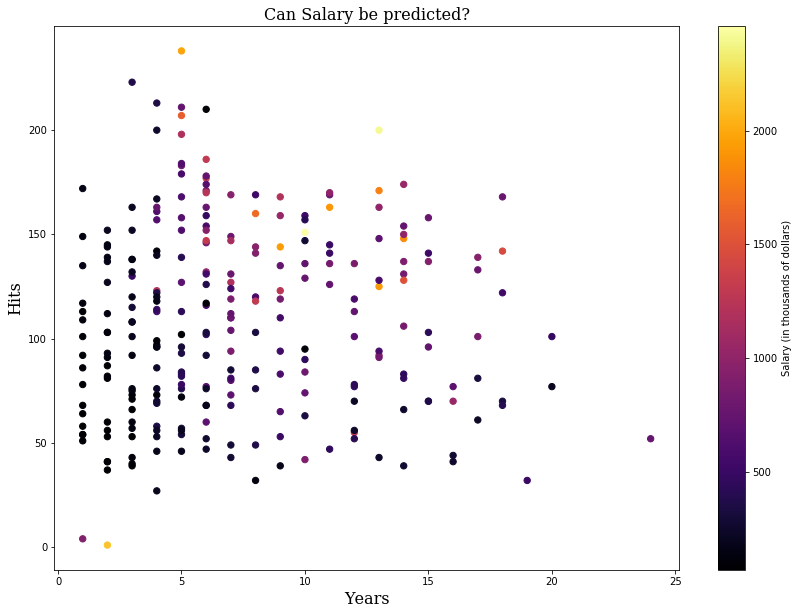

In [7]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (14,10)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x = data['Years'], y = data['Hits'], c = data['Salary'], s=40, cmap='inferno')
plt.title("Can Salary be predicted?",
          fontdict=font)
plt.xlabel("Years", fontdict=font)
plt.ylabel("Hits", fontdict=font)
color_bar = plt.colorbar()
color_bar.ax.set_ylabel('Salary (in thousands of dollars)')
plt.show()

#### Are the variables correlated?

In [50]:
data2 = data.copy()

data2['salary_log'] = np.log(data2['Salary'])

In [52]:
corr = data2[['Years','Hits','salary_log']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Years,Hits,salary_log
Years,1,0.0185981,0.537371
Hits,0.0185981,1,0.449584
salary_log,0.537371,0.449584,1


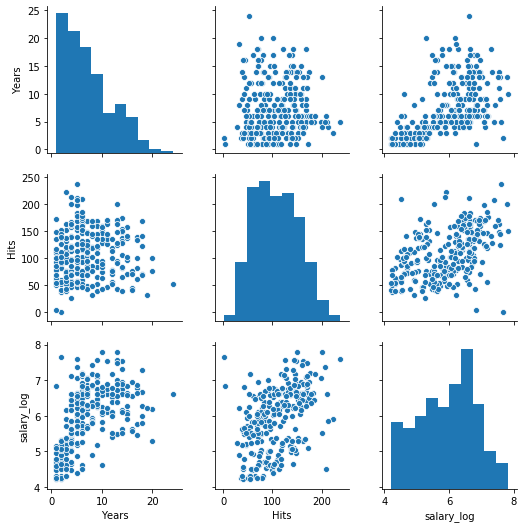

In [53]:
# Create the default pairplot
sns.pairplot(data2[['Years','Hits','salary_log']])

In [8]:
corr = data[['Years','Hits','Salary']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Years,Hits,Salary
Years,1,0.0185981,0.400657
Hits,0.0185981,1,0.438675
Salary,0.400657,0.438675,1


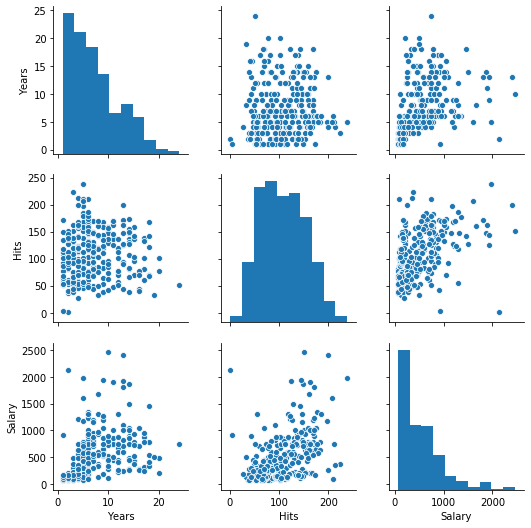

In [9]:
# Create the default pairplot
sns.pairplot(data[['Years','Hits','Salary']])



### Feature Engineering and Data Transformation

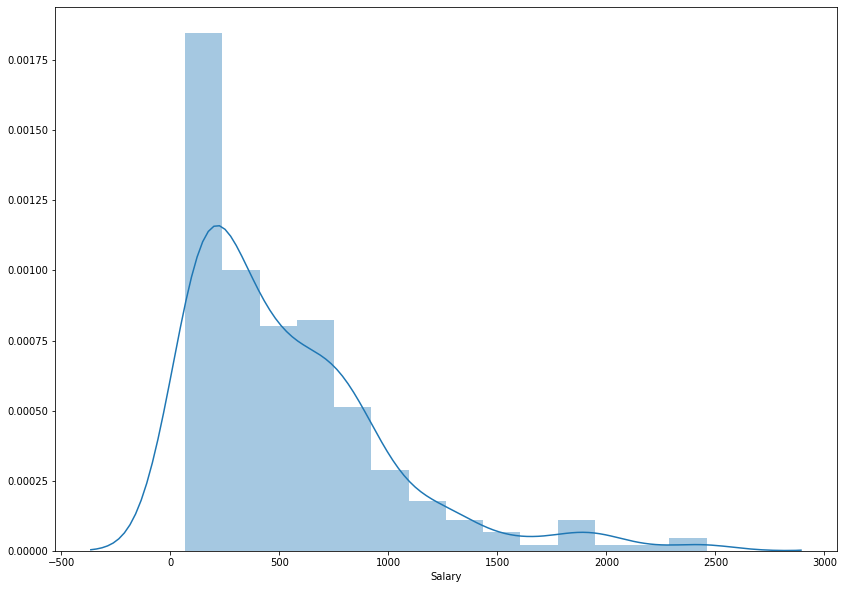

In [10]:
ax1 = sns.distplot(data['Salary'])

##### We can observet that the Salary distribution is right-skewed. Let's try to apply a log transformation to see if tha's better.

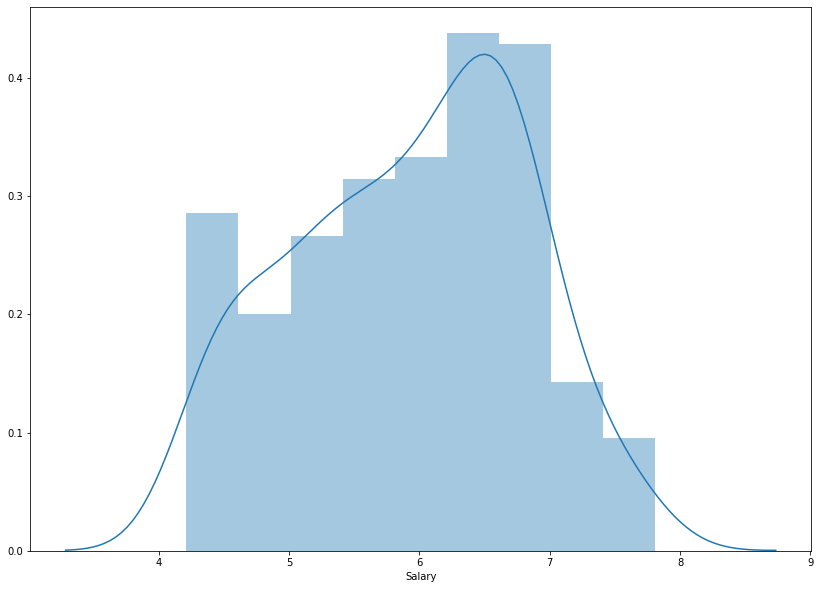

In [11]:
#plt.hist(np.log(df['Salary']), bin = 10)

ax2 = sns.distplot(np.log(data['Salary']))

### Let's build a Decision Tree Model

In [32]:
# inputs
X = data[['Years','Hits']]

# output
Y = np.log(data['Salary'])

# spliting into training and test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 13 )


###### TRAIN MODEL

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [65]:
tree_model = DecisionTreeRegressor(max_leaf_nodes = 5, random_state = 0, min_samples_leaf = 3 )

tree_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

#### Feature Importances

In [66]:
tree_model.feature_importances_

array([0.75438608, 0.24561392])

##### GRAPH 

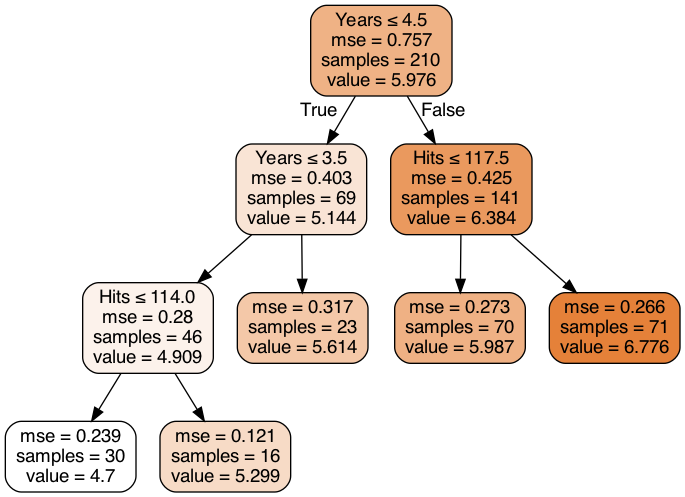

In [67]:
dot_data = export_graphviz(tree_model,
                           feature_names=['Years', 'Hits'],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydot.graph_from_dot_data(dot_data)  
Image(graph[0].create_png())

#graph.write_png('Hitter_decision_tree.png')

##### REGIONS IN DECISION TREES

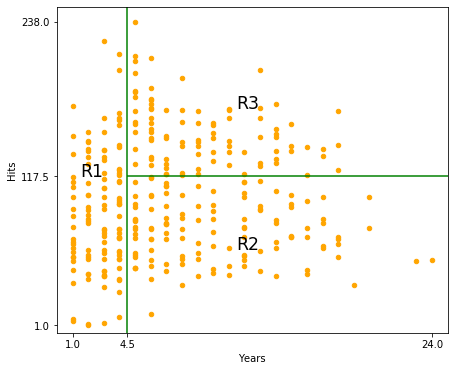

In [35]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(bottom=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])

plt.vlines(4.5, ymin=-5, ymax=250, colors="green")
plt.hlines(117.5, xmin=4.5, xmax=25, colors="green")
plt.annotate('R1', xy=(1.5,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11.5,60), fontsize='xx-large')
plt.annotate('R3', xy=(11.5,170), fontsize='xx-large');

##### PREDICT

In [63]:
y_pred = tree_model.predict(x_test)

#####  MODEL EVALUATION

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.6984247478148486

In [41]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape

9.702994200863516